# SPS Intensity
<hr style="border-top-width: 4px; border-top-color: #34609b;">

A study of the [SPS](https://home.cern/about/accelerators/super-proton-synchrotron) intensity.

In [2]:
# Enable an interactive mode for Matplotlib plots
%matplotlib notebook

import matplotlib.pyplot as pl 
import pytimber

In [4]:
db = pytimber.LoggingDB(spark_session=spark)

In [6]:
db.search_variables('%SPS%BCT%TOTAL_INTEN%')

['SPS.BCTW.31931:TOTAL_INTENSITY',
 'SPS.BCTDC.51456:TOTAL_INTENSITY',
 'SPS.BCTFR.31450:TOTAL_INTENSITY',
 'SPS.BCTDC.51897:TOTAL_INTENSITY',
 'SPS.BCTDC.51454:TOTAL_INTENSITY',
 'SPS.BCTDC.41435:TOTAL_INTENSITY',
 'SPS.BCTDC.51895:TOTAL_INTENSITY',
 'SPS.BCTDC.31832:TOTAL_INTENSITY']

In [49]:
data = db.get('SPS.BCTDC.51895:TOTAL_INTENSITY', '2016-08-02 12:00:00', '2016-08-02 12:01:00')

<IPython.core.display.Javascript object>


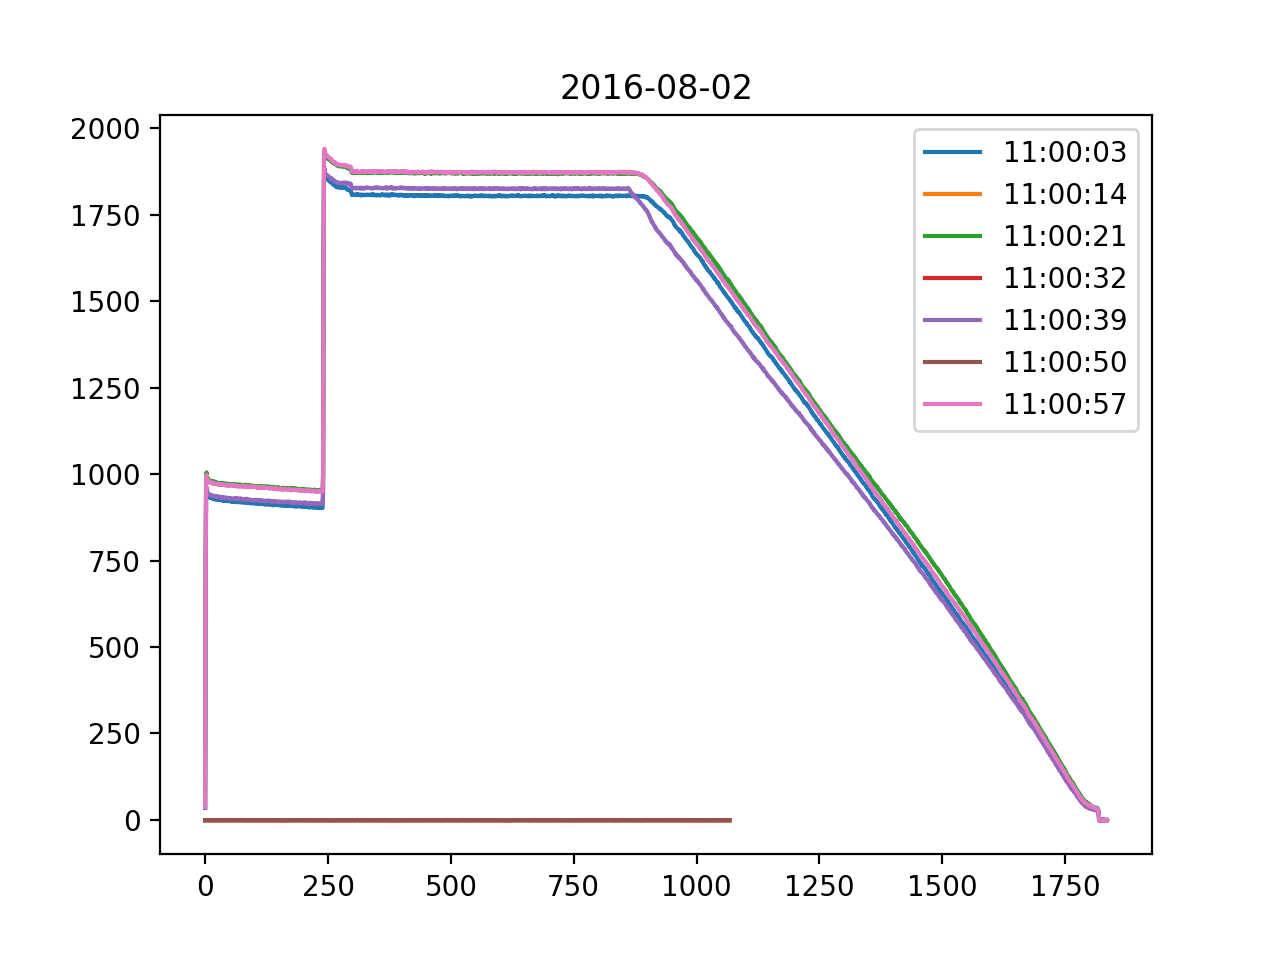

In [50]:
from datetime import datetime
import pytz
import time

def dumpdate(t=None, fmt="%Y-%m-%d %H:%M:%S.SSS"):
    utc_dt = datetime.utcfromtimestamp(t)
    tz = pytz.timezone("Europe/Zurich")
    tz_dt = utc_dt.astimezone(tz)
    return tz_dt.strftime(fmt)


pl.clf()
timestamps, intensities=data['SPS.BCTDC.51895:TOTAL_INTENSITY']


for ts,d in zip(timestamps, intensities):
  pl.plot(d,label=dumpdate(ts, fmt='%H:%M:%S'))


pl.title(dumpdate(ts, fmt='%Y-%m-%d'))
pl.legend()
